### **Chapter 01. 과일 사진 데이터 준비하기**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("fruits 360\\Pineapple\\0_100.jpg") # image read

print(type(img))

<class 'numpy.ndarray'>


In [3]:
img.shape # (가로, 세로, R-G-B)

(100, 100, 3)

In [4]:
R = img[0:100, 0:100, 0]
G = img[0:100, 0:100, 1]
B = img[0:100, 0:100, 2]

print(R.shape) # (가로, 세로)로 차원이 축소됨

(100, 100)


In [5]:
# 𝒀 = 𝟎. 𝟐𝟗𝟗 × 𝑹𝒆𝒅 + 𝟎. 𝟓𝟖𝟕 × 𝑮𝒓𝒆𝒆𝒏 + 𝟎. 𝟏𝟏𝟒 × 𝑩𝒍𝒖�
imgGray = 0.299 * R + 0.587 * G + 0.114 * B

print(imgGray.shape)
print(imgGray)

imgGray = np.array(imgGray, dtype="int")

print(imgGray.shape)
print(imgGray)

(100, 100)
[[254.701 254.701 255.    ... 255.    255.    255.   ]
 [254.701 254.701 255.    ... 255.    255.    255.   ]
 [255.    255.    255.    ... 255.    255.    255.   ]
 ...
 [255.    255.    255.    ... 255.    255.    255.   ]
 [255.    255.    255.    ... 255.    255.    255.   ]
 [255.    255.    255.    ... 255.    255.    255.   ]]
(100, 100)
[[254 254 255 ... 255 255 255]
 [254 254 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


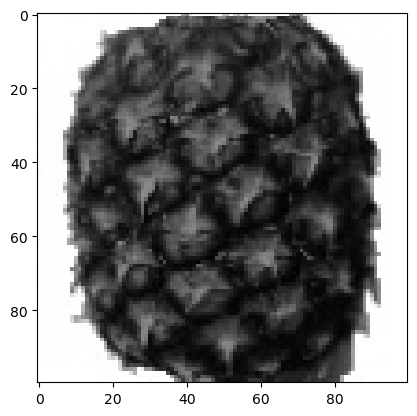

In [6]:
plt.figure()

# image show
plt.imshow(imgGray, cmap="gray") # color map

plt.show()

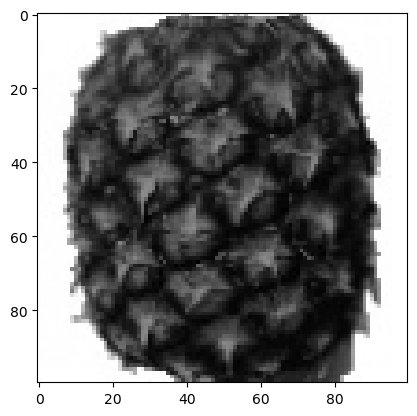

In [7]:
imgGray_pa = 255 - imgGray

plt.figure()

# image show
plt.imshow(imgGray_pa, cmap="gray_r") # color map

plt.show()

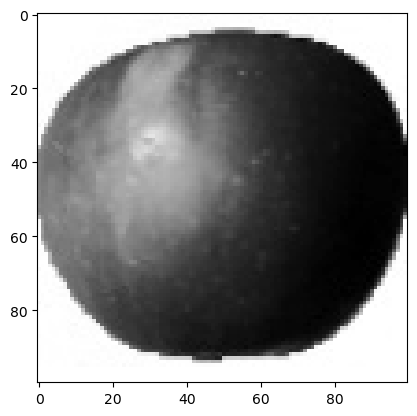

In [8]:
img = mpimg.imread("fruits 360\\Apple\\0_100.jpg")

R = img[0:100, 0:100, 0]
G = img[0:100, 0:100, 1]
B = img[0:100, 0:100, 2]


imgGray = 0.299 * R + 0.587 * G + 0.114 * B

imgGray_ap = 255 - imgGray

plt.figure()

# image show
plt.imshow(imgGray_ap, cmap="gray_r") # color map

plt.show()

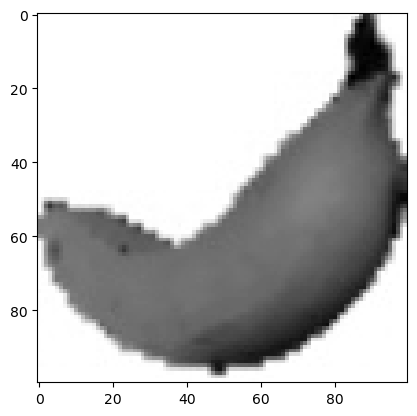

In [9]:
img = mpimg.imread("fruits 360\\Banana\\0_100.jpg")

R = img[0:100, 0:100, 0]
G = img[0:100, 0:100, 1]
B = img[0:100, 0:100, 2]


imgGray = 0.299 * R + 0.587 * G + 0.114 * B

imgGray_ba = 255 - imgGray

plt.figure()

# image show
plt.imshow(imgGray_ba, cmap="gray_r") # color map

plt.show()

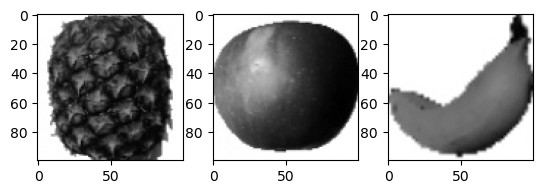

In [16]:
# imgGray_pa
# imgGray_ap
# imgGray_ba

plt.subplot(1, 3, 1) # row의 개수, col의 개수, 번호
plt.imshow(imgGray_pa, cmap="gray_r")

plt.subplot(1, 3, 2)
plt.imshow(imgGray_ap, cmap="gray_r")

plt.subplot(1, 3, 3)
plt.imshow(imgGray_ba, cmap="gray_r")

plt.show()

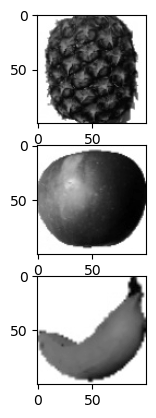

In [17]:
plt.subplot(3, 1, 1) # 번호에 0부터 시작하면 안 된다!
plt.imshow(imgGray_pa, cmap="gray_r")

plt.subplot(3, 1, 2)
plt.imshow(imgGray_ap, cmap="gray_r")

plt.subplot(3, 1, 3)
plt.imshow(imgGray_ba, cmap="gray_r")

plt.show()

In [3]:
import os

cur_dir = os.getcwd() # get + current working directory
#print(cur_dir)

print(cur_dir + "\\fruits 360")
cur_dir = cur_dir + "\\fruits 360"

fruit_list = ["Apple", "Banana", "Pineapple"]

fruit_npy = []

for fruit_name in fruit_list:
    folder_name = cur_dir + "\\" + fruit_name
    #print(folder_name)
    
    file_list = os.listdir(folder_name)
    for file_name in file_list:
        full_dir = folder_name + "\\" + file_name
        
        img = mpimg.imread(full_dir)

        R = img[0:100, 0:100, 0]
        G = img[0:100, 0:100, 1]
        B = img[0:100, 0:100, 2]

        imgGray = 0.299 * R + 0.587 * G + 0.114 * B

        imgGray2 = 255 - imgGray
        
        fruit_npy.append(imgGray2)

fruit_npy = np.array(fruit_npy)
print(fruit_npy.shape)

C:\Users\user\Desktop\J\DDWU\24-1\인딥입\fruits 360
(1470, 100, 100)


In [ ]:
#np.save("test.npy", fruit_npy)

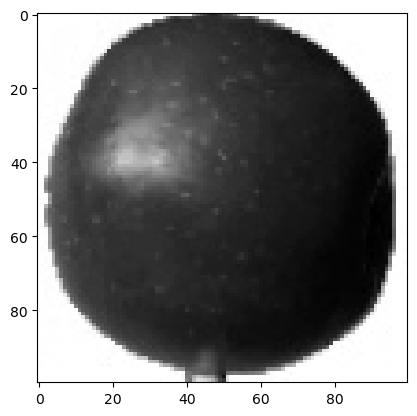

In [14]:
img = fruit_npy[400, :, :]

plt.figure()

# image show
plt.imshow(img, cmap="gray_r") # color map

plt.show()

### **Chapter 02. 픽셀값 분석하기**

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

fruits = np.load("fruits.npy")

print(fruits.shape)

(1470, 100, 100)


In [6]:
# ["Apple", "Banana", "Pineapple"]

apple = fruits[0:490, :, :]
banana = fruits[490:980, :, :]
pineapple = fruits[980:1470] # : 모두 생략 ㄱㄴ

print(apple.shape)

(490, 100, 100)


In [8]:
apple = fruits[0:490, :, :].reshape(490, 100*100)
banana = fruits[490:980, :, :].reshape(-1, 10000) # 샘플의 개수를 모르면 -1로 지정하면 자동으로 샘플의 개수가 됨
pineapple = fruits[980:1470].reshape(-1, 10000)

print(apple.shape)
print(banana.shape)
print(pineapple.shape)

(490, 10000)
(490, 10000)
(490, 10000)


In [9]:
a = np.mean(apple, axis=0) # 0:index / 1:columns
print(a.shape) # x1, x2, ..., x10000

(10000,)


In [11]:
b = np.mean(apple, axis=1)
print(b.shape)
print(b[0]) # 0번 이미지의 10000개의 픽셀의 평균값!

(490,)
133.6748


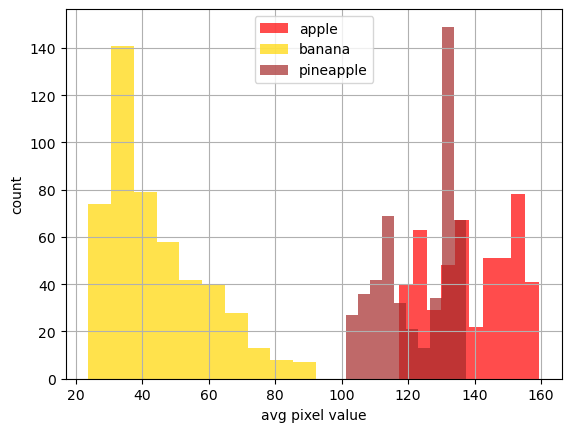

In [20]:
plt.figure()

# alpha 투명도를 조정
# 0.0 ~ 1.0(기본값)
# alpha = 0.0 --> 투명
# alpha = 1.0(기본값) --> 불투명

plt.hist(np.mean(apple, axis=1), alpha=0.7, label="apple", color="red")
plt.hist(np.mean(banana, axis=1), alpha=0.7, label="banana", color="gold")
plt.hist(np.mean(pineapple, axis=1), alpha=0.7, label="pineapple", color="brown")

plt.legend()
plt.grid()
plt.ylabel("count")
plt.xlabel("avg pixel value")

plt.show()

# 255-imgGray 하지 않았다면 서로 좌우 반전된 이미지였을 것

In [21]:
# 두 번째 전략 for 군집화

apple_mean = np.mean(apple, axis=0) # 0:index
banana_mean = np.mean(banana, axis=0)
pineapple_mean = np.mean(pineapple, axis=0)

print(a.shape) # x1, x2, ..., x10000

(10000,)


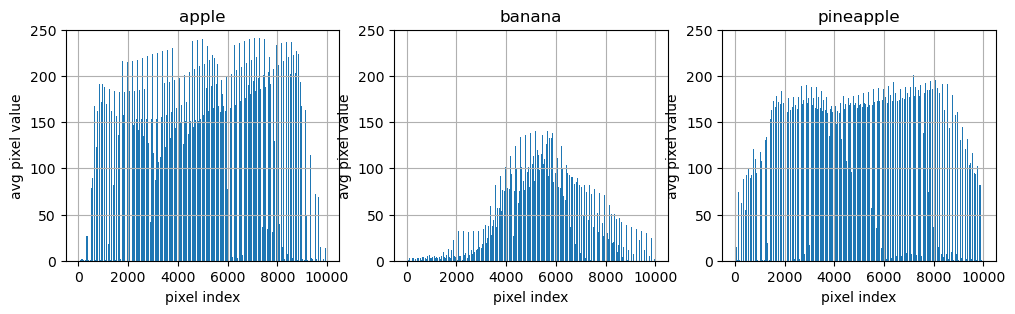

In [24]:
plt.figure(figsize=(12, 3))

# alpha 투명도를 조정
# 0.0 ~ 1.0(기본값)
# alpha = 0.0 --> 투명
# alpha = 1.0(기본값) --> 불투명

plt.subplot(1, 3, 1) # row, col, index
plt.title("apple")
plt.bar(range(0,10000,1), apple_mean)
plt.xlabel("pixel index")
plt.ylabel("avg pixel value")
plt.ylim([0,250])
plt.grid()

plt.subplot(1, 3, 2)
plt.title("banana")
plt.bar(range(0,10000,1), banana_mean)
plt.xlabel("pixel index")
plt.ylabel("avg pixel value")
plt.ylim([0,250])
plt.grid()

plt.subplot(1, 3, 3)
plt.title("pineapple")
plt.bar(range(0,10000,1), pineapple_mean)
plt.xlabel("pixel index")
plt.ylabel("avg pixel value")
plt.ylim([0,250])
plt.grid()

plt.show()

In [25]:
print(apple_mean.shape)

(10000,)


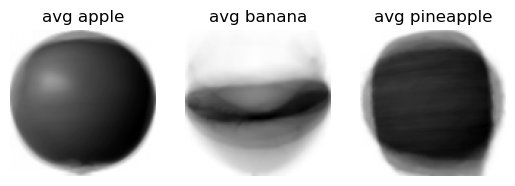

In [32]:
plt.figure()

plt.subplot(1, 3, 1)
plt.title("avg apple")
plt.imshow(apple_mean.reshape(100, 100), cmap="gray_r")
plt.axis("off") # 축의 테두리 등이 사라짐

plt.subplot(1, 3, 2)
plt.title("avg banana")
plt.imshow(banana_mean.reshape(100, 100), cmap="gray_r")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("avg pineapple")
plt.imshow(pineapple_mean.reshape(100, 100), cmap="gray_r")
plt.axis("off")

plt.show()

### **Chapter 03. 평균값과 가까운 사진 구하기**

In [34]:
print(fruits.shape)

print(apple_mean.shape)
print(banana_mean.shape)
print(pineapple_mean.shape)

(1470, 100, 100)
(10000,)
(10000,)
(10000,)


In [35]:
apple_mean = apple_mean.reshape(100, 100)
banana_mean = banana_mean.reshape(100, 100)
pineapple_mean = pineapple_mean.reshape(100, 100)

print(apple_mean.shape)
print(banana_mean.shape)
print(pineapple_mean.shape)

(100, 100)
(100, 100)
(100, 100)


In [37]:
# difference n.차이
abs_diff = np.abs(fruits - apple_mean)

print(abs_diff.shape) # 3-D Array

(1470, 100, 100)


In [38]:
abs_mean = np.mean(abs_diff, axis=(1, 2))

print(abs_mean.shape)

(1470,)


In [40]:
print(abs_mean)

[22.56955347 20.59220694 20.42081592 ... 49.03340367 50.40240122
 39.60204408]


In [42]:
arr = [5, 28, 2024, 2]

print(arr)
print(np.argsort(arr)) # 2, 5, 28, 2024
# 값이 오름차순으로 정렬될 수 있게 인덱스값을 반환함

[5, 28, 2024, 2]
[3 0 1 2]


In [45]:
apple_index = np.argsort(abs_mean)[0:100]
print(apple_index)

[  4   2   5   6   3   1  17 329  19 328 327  23  18 326  24  21  20 325
  25  26 324 244  35  37  34 233  32  31  27  30 356  36  28 345  38  39
  29 334  40 322  41  43  42 323 321  11  13 331   8 333  14  10 312 245
 332 412  12  15 257  45 401  48 301 330  16 335 199  46 390   9 210 290
 188  47   7 155 221 379 177 318 320 133 144 166  50 241  99 110  49  88
 122  66 317 240  53  77  52  51  55  54]


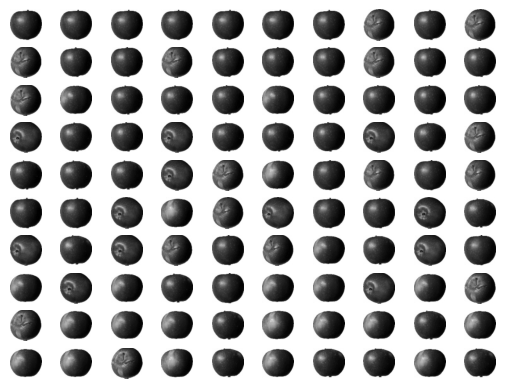

In [47]:
plt.figure()

for j in range(0, 10, 1): # row
    for k in range(0, 10, 1): # col
        index = j * 10 + k
        
        plt.subplot(10, 10, index + 1) # subplot은 1부터 시작하기 때문에 +1 해준다
        plt.imshow(fruits[apple_index[index]], cmap="gray_r")
        plt.axis("off")

plt.show()

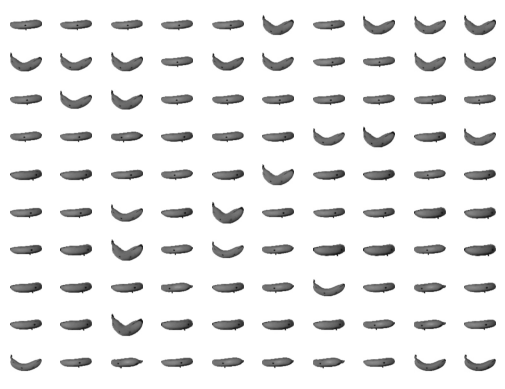

In [48]:
abs_diff = np.abs(fruits - banana_mean)
abs_mean = np.mean(abs_diff, axis=(1, 2))
banana_index = np.argsort(abs_mean)[0:100]

plt.figure()

for j in range(0, 10, 1): # row
    for k in range(0, 10, 1): # col
        index = j * 10 + k
        
        plt.subplot(10, 10, index + 1) # subplot은 1부터 시작하기 때문에 +1 해준다
        plt.imshow(fruits[banana_index[index]], cmap="gray_r")
        plt.axis("off")

plt.show()

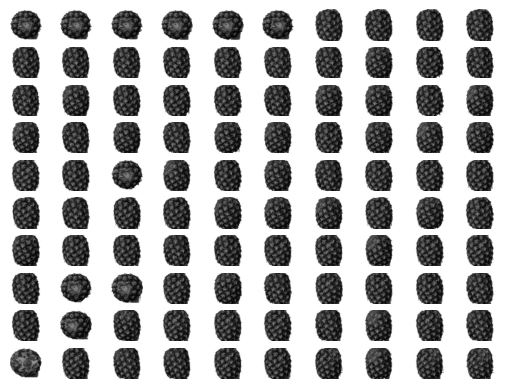

In [49]:
abs_diff = np.abs(fruits - pineapple_mean)
abs_mean = np.mean(abs_diff, axis=(1, 2))
pineapple_index = np.argsort(abs_mean)[0:100]

plt.figure()

for j in range(0, 10, 1): # row
    for k in range(0, 10, 1): # col
        index = j * 10 + k
        
        plt.subplot(10, 10, index + 1) # subplot은 1부터 시작하기 때문에 +1 해준다
        plt.imshow(fruits[pineapple_index[index]], cmap="gray_r")
        plt.axis("off")

plt.show()